<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: SOBIA ALAMGIR</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/sobiahashmi) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.linkedin.com/in/sobia-alamgir-a027b939/) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/sobia-alamgir-a027b939/)
[![Streamlit](https://img.shields.io/badge/Streamlit-Open%20App-FF4B4B?style=for-the-badge&logo=streamlit&logoColor=white)](https://pipelineimdb.streamlit.app/)


<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">End-to-End Data Pipeline for Movie Analytics</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>

**Task Overview**

**Objective:** Build a full data pipeline to analyze IMDB movie data using Python and SQL.

**Deliverables:**

- Data ingestion (from CSV or API)
- Data cleaning (missing values, outlier treatment)
- SQL schema design and population (SQLite or PostgreSQL)
- Dash or Streamlit dashboard with filters

**Table of contents**<a id='toc0_'></a>    
  - [Step-01 Load Libraries](#toc1_1_)    
  - [Step-02 Load Dataset](#toc1_2_)    
  - [Step-03 Data Preprocessing](#toc1_3_)    
      - [Information about dataset](#toc1_3_1_1_)    
      - [Description](#toc1_3_1_2_)    
      - [Let's check Null values](#toc1_3_1_3_)    
      - [Let's drop irrelevant columns](#toc1_3_1_4_)    
      - [Correlation](#toc1_3_1_5_)    
      - [Handle Outliers](#toc1_3_1_6_)    
      - [Remove Outliers in df['Rating']](#toc1_3_1_7_)    
  - [Step-04 Create Connection and Table](#toc1_4_)    
      - [SQL Schema Design](#toc1_4_1_1_)    
      - [SQL Schema Population](#toc1_4_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Step-01 Load Libraries](#toc0_)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sqlite3

## <a id='toc1_2_'></a>[Step-02 Load Dataset](#toc0_)

In [ ]:
n = 10000

df = pd.DataFrame({
    'MovieID': np.arange(n),
    'Title': [f'Movie {i}' for i in range(n)],
    'Genre': np.random.choice(['Drama', 'Comedy', 'Action', 'Horror'], size=n),
    'ReleaseYear': np.random.randint(1980, 2024, size=n),
    'Rating': np.round(np.random.normal(loc=6.5, scale=1.5, size=n), 1),
    'Votes': np.random.randint(100, 100000, size=n),
    'RevenueMillions': np.round(np.random.uniform(1, 300, size=n), 2)
})

display(df.head())
print("Number of Records: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

,MovieID,Title,Genre,ReleaseYear,Rating,Votes,RevenueMillions
0,0,Movie 0,Comedy,2011,6.6,86411,12.23
1,1,Movie 1,Drama,2014,5.2,3226,9.24
2,2,Movie 2,Action,2021,5.1,553,54.98
3,3,Movie 3,Horror,2012,7.5,30604,265.24
4,4,Movie 4,Drama,2004,6.5,60463,228.71


Number of Records:  10000
Number of Columns:  7


## <a id='toc1_3_'></a>[Step-03 Data Preprocessing](#toc0_)

#### <a id='toc1_3_1_1_'></a>[Information about dataset](#toc0_)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MovieID          10000 non-null  int32  
 1   Title            10000 non-null  object 
 2   Genre            10000 non-null  object 
 3   ReleaseYear      10000 non-null  int32  
 4   Rating           10000 non-null  float64
 5   Votes            10000 non-null  int32  
 6   RevenueMillions  10000 non-null  float64
dtypes: float64(2), int32(3), object(2)
memory usage: 429.8+ KB


#### <a id='toc1_3_1_2_'></a>[Description](#toc0_)

In [ ]:
df.describe()

,MovieID,ReleaseYear,Rating,Votes,RevenueMillions
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,2001.45850,6.493650,50194.294700,149.589264
std,2886.89568,12.67663,1.519348,28685.631106,86.006603
min,0.00000,1980.00000,0.500000,100.000000,1.010000
25%,2499.75000,1990.75000,5.500000,25479.750000,75.130000
50%,4999.50000,2001.00000,6.500000,50239.000000,149.145000
75%,7499.25000,2012.00000,7.500000,74931.500000,223.425000
max,9999.00000,2023.00000,12.700000,99984.000000,299.980000


#### <a id='toc1_3_1_3_'></a>[Let's check Null values](#toc0_)

In [5]:
df.isnull().sum()

MovieID            0
Title              0
Genre              0
ReleaseYear        0
Rating             0
Votes              0
RevenueMillions    0
dtype: int64

In [ ]:
df.columns

Index(['MovieID', 'Title', 'Genre', 'ReleaseYear', 'Rating', 'Votes',
       'RevenueMillions'],
      dtype='object')

#### <a id='toc1_3_1_4_'></a>[Let's drop irrelevant columns](#toc0_)

In [28]:
df.drop(['MovieID'], axis = 1 , inplace = True)

In [ ]:
df.head()

,Title,Genre,ReleaseYear,Rating,Votes,RevenueMillions
0,Movie 0,Comedy,2011,6.6,86411,12.23
1,Movie 1,Drama,2014,5.2,3226,9.24
2,Movie 2,Action,2021,5.1,553,54.98
3,Movie 3,Horror,2012,7.5,30604,265.24
4,Movie 4,Drama,2004,6.5,60463,228.71


#### <a id='toc1_3_1_5_'></a>[Correlation](#toc0_)

In [ ]:
df.corr(numeric_only=True)

,ReleaseYear,Rating,Votes,RevenueMillions
ReleaseYear,1.000000,0.019910,-0.003148,-0.006116
Rating,0.019910,1.000000,-0.007380,-0.001153
Votes,-0.003148,-0.007380,1.000000,-0.002726
RevenueMillions,-0.006116,-0.001153,-0.002726,1.000000


#### <a id='toc1_3_1_6_'></a>[Handle Outliers](#toc0_)

<Axes: ylabel='Rating'>

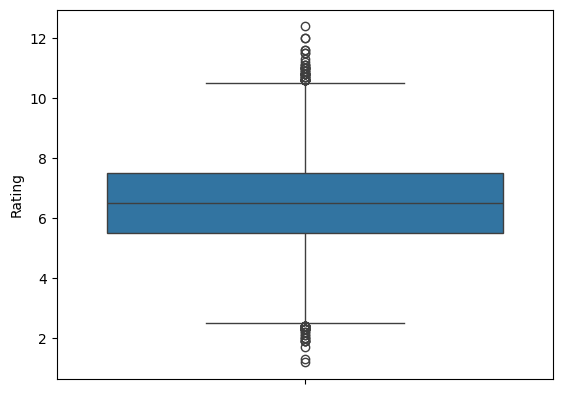

In [31]:
sns.boxplot(df['Rating'])

<Axes: ylabel='ReleaseYear'>

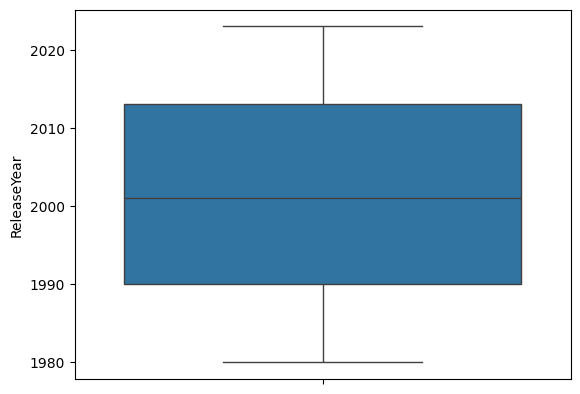

In [32]:
sns.boxplot(df['ReleaseYear'])

<Axes: ylabel='Votes'>

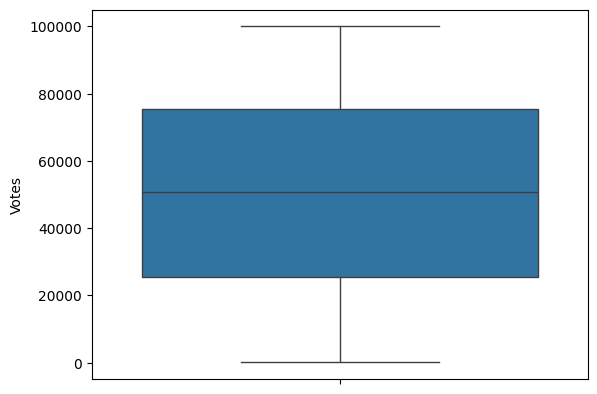

In [33]:
sns.boxplot(df['Votes'])

<Axes: ylabel='RevenueMillions'>

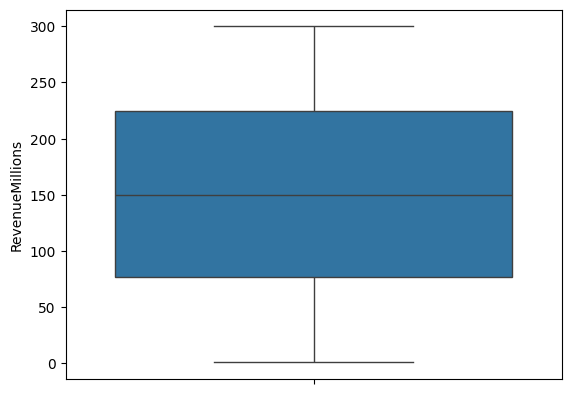

In [ ]:
sns.boxplot(df['RevenueMillions'])

#### <a id='toc1_3_1_7_'></a>[Remove Outliers in df['Rating']](#toc0_)

In [35]:
df["Rating"].max(), df["Rating"].min()

(12.4, 1.2)

In [36]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

df_cleaned = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]
df_cleaned.head()

2.5 10.5


,Title,Genre,ReleaseYear,Rating,Votes,RevenueMillions
0,Movie 0,Comedy,2011,6.6,86411,12.23
1,Movie 1,Drama,2014,5.2,3226,9.24
2,Movie 2,Action,2021,5.1,553,54.98
3,Movie 3,Horror,2012,7.5,30604,265.24
4,Movie 4,Drama,2004,6.5,60463,228.71


In [37]:
df_cleaned.shape

(9920, 6)

<Axes: ylabel='Rating'>

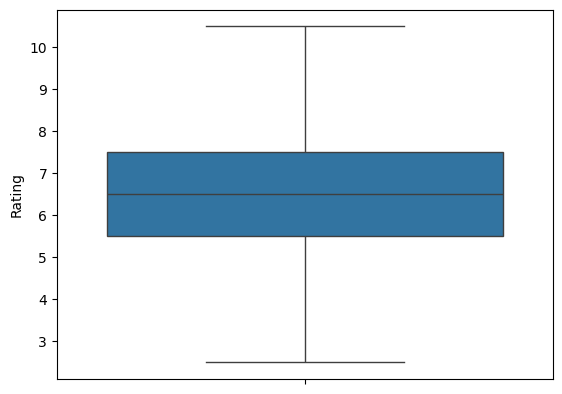

In [27]:
sns.boxplot(df_cleaned['Rating'])

In [ ]:
df_cleaned["Genre"].value_counts()

Genre
Drama     2540
Comedy    2513
Action    2441
Horror    2426
Name: count, dtype: int64

## <a id='toc1_4_'></a>[Step-04 Create Connection and Table](#toc0_)

In [40]:
conn = sqlite3.connect("imdb.db")
df.to_sql("movies", conn, if_exists="replace", index=False)
conn.close()

In [ ]:
# Step 2: Connect to SQLite
conn = sqlite3.connect("imdb.db")
#Test read
df_sql = pd.read_sql("SELECT * FROM movies", conn)

#### <a id='toc1_4_1_1_'></a>[SQL Schema Design](#toc0_)

In [ ]:
cursor = conn.cursor()
cursor.execute("""
INSERT INTO movies (Title, Genre, ReleaseYear, Rating, Votes, RevenueMillions)
VALUES 
('Movie 0', 'Comedy', 2011, 6.6, 86411, 12.23),
('Movie 1', 'Drama', 2014, 5.2, 3226, 9.24),
('Movie 2', 'Action', 2021, 5.1, 553, 54.98),
('Movie 3', 'Horror', 2012, 7.5, 30604, 265.24),
('Movie 4', 'Drama', 2004, 6.5, 60463, 228.71)
""")

df_sql = pd.read_sql("SELECT * FROM movies", conn)
df_sql.head()

,Title,Genre,ReleaseYear,Rating,Votes,RevenueMillions
0,Movie 0,Comedy,2011,6.6,86411,12.23
1,Movie 1,Drama,2014,5.2,3226,9.24
2,Movie 2,Action,2021,5.1,553,54.98
3,Movie 3,Horror,2012,7.5,30604,265.24
4,Movie 4,Drama,2004,6.5,60463,228.71


#### <a id='toc1_4_1_2_'></a>[SQL Schema Population](#toc0_)
There are two ways:
- Manual using Insert
- Populate from DataFrame:

In [ ]:
# Option 1: Manual using INSERT Query
cursor.execute("""
INSERT INTO movies (Title, Genre, ReleaseYear, Rating, Votes, RevenueMillions)
VALUES ('Movie 0', 'Comedy', 2011, 6.6, 86411, 12.23)
""")

In [54]:
# Option 2: Populate from DataFrame
df_cleaned.to_sql("movies", conn, if_exists="replace", index=False)
df_cleaned.shape

(9920, 6)

* **Option 2 is even better because it populates all rows from your full DataFrame into SQLite automatically!**

In [47]:
conn.commit()   # Save changes
conn.close()    # Hang up the call

<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Thankyou</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>